In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
filepath = "/media/yuk/HOLLOW/SharedRoot/machine/MainProjects/EmphysemaDetection/dataset.csv"

empo = pd.read_csv(filepath)
empo.head()

,Unnamed: 0,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,1,58,77,60.0,SEVERE,120.0,120.0,120.0,1.21,36.0,2.40,98,25,8.0,69.55,4,3,1,2,1,0,0,1,0
1,2,57,79,50.0,MODERATE,165.0,176.0,176.0,1.09,56.0,1.64,65,12,21.0,44.24,4,2,0,2,1,0,0,1,1
2,3,62,80,11.0,MODERATE,201.0,180.0,201.0,1.52,68.0,2.30,86,22,18.0,44.09,4,2,0,2,1,0,0,1,0
3,4,145,56,60.0,VERY SEVERE,210.0,210.0,210.0,0.47,14.0,1.14,27,28,26.0,62.04,1,4,1,2,0,0,1,1,0
4,5,136,65,68.0,SEVERE,204.0,210.0,210.0,1.07,42.0,2.91,98,32,18.0,75.56,1,3,1,2,0,1,1,0,0


In [21]:
empo.describe()

,AGE,PackHistory,MWT1Best,FEV1,FVC,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
count,101.00000,101.000000,100.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.00000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,70.09901,39.698020,399.110000,1.603762,2.954950,19.336634,11.180198,40.185842,2.475248,2.19802,0.643564,1.841584,0.207921,0.188119,0.118812,0.198020,0.089109
std,7.89874,24.558713,106.550116,0.672763,0.976283,18.674730,8.588807,18.239268,1.109901,0.88340,0.481335,0.366952,0.407844,0.392756,0.325181,0.400495,0.286322
min,44.00000,1.000000,120.000000,0.450000,1.140000,3.000000,0.000000,2.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.00000,20.000000,303.750000,1.100000,2.270000,12.000000,6.000000,28.410000,1.000000,2.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,71.00000,36.000000,420.000000,1.600000,2.770000,18.000000,10.000000,38.210000,3.000000,2.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.00000,54.000000,465.250000,1.960000,3.630000,24.000000,15.000000,55.230000,3.000000,3.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,88.00000,109.000000,699.000000,3.180000,5.370000,188.000000,56.200000,77.440000,4.000000,4.00000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
empo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AGE           101 non-null    int64  
 1   PackHistory   101 non-null    float64
 2   COPDSEVERITY  101 non-null    object 
 3   MWT1Best      100 non-null    float64
 4   FEV1          101 non-null    float64
 5   FVC           101 non-null    float64
 6   CAT           101 non-null    int64  
 7   HAD           101 non-null    float64
 8   SGRQ          101 non-null    float64
 9   AGEquartiles  101 non-null    int64  
 10  copd          101 non-null    int64  
 11  gender        101 non-null    int64  
 12  smoking       101 non-null    int64  
 13  Diabetes      101 non-null    int64  
 14  muscular      101 non-null    int64  
 15  hypertension  101 non-null    int64  
 16  AtrialFib     101 non-null    int64  
 17  IHD           101 non-null    int64  
dtypes: float64(6), int64(11), obje

In [ ]:
list(empo.columns.values)

['Unnamed: 0',
 'ID',
 'AGE',
 'PackHistory',
 'COPDSEVERITY',
 'MWT1',
 'MWT2',
 'MWT1Best',
 'FEV1',
 'FEV1PRED',
 'FVC',
 'FVCPRED',
 'CAT',
 'HAD',
 'SGRQ',
 'AGEquartiles',
 'copd',
 'gender',
 'smoking',
 'Diabetes',
 'muscular',
 'hypertension',
 'AtrialFib',
 'IHD']

In [5]:
empo.isna().sum()

Unnamed: 0      0
ID              0
AGE             0
PackHistory     0
COPDSEVERITY    0
MWT1            2
MWT2            1
MWT1Best        1
FEV1            0
FEV1PRED        0
FVC             0
FVCPRED         0
CAT             0
HAD             0
SGRQ            0
AGEquartiles    0
copd            0
gender          0
smoking         0
Diabetes        0
muscular        0
hypertension    0
AtrialFib       0
IHD             0
dtype: int64

In [6]:
empo.shape

(101, 24)

In [7]:
columns = ['Unnamed: 0','ID','FEV1PRED','FVCPRED','MWT1','MWT2']
empo.drop(columns = columns , axis =1 , inplace = True )

In [8]:
empo.shape

(101, 18)

In [9]:
empo[empo['MWT1Best'].isna()]

,AGE,PackHistory,COPDSEVERITY,MWT1Best,FEV1,FVC,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
100,78,55.0,MODERATE,NaN,1.15,2.01,18,7.0,30.21,4,2,1,2,0,0,0,0,0


In [10]:
empo.head()

,AGE,PackHistory,COPDSEVERITY,MWT1Best,FEV1,FVC,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,77,60.0,SEVERE,120.0,1.21,2.40,25,8.0,69.55,4,3,1,2,1,0,0,1,0
1,79,50.0,MODERATE,176.0,1.09,1.64,12,21.0,44.24,4,2,0,2,1,0,0,1,1
2,80,11.0,MODERATE,201.0,1.52,2.30,22,18.0,44.09,4,2,0,2,1,0,0,1,0
3,56,60.0,VERY SEVERE,210.0,0.47,1.14,28,26.0,62.04,1,4,1,2,0,0,1,1,0
4,65,68.0,SEVERE,210.0,1.07,2.91,32,18.0,75.56,1,3,1,2,0,1,1,0,0


In [11]:
num_col = empo.drop('COPDSEVERITY',axis=1)
cat_col = empo['COPDSEVERITY']

In [16]:
from sklearn.impute import SimpleImputer
impu = SimpleImputer(strategy='mean')
imputed_num_col = impu.fit_transform(num_col)
imputed_empo = pd.DataFrame(imputed_num_col , columns=num_col.columns)

In [17]:
imputed_empo.isna().sum()

AGE             0
PackHistory     0
MWT1Best        0
FEV1            0
FVC             0
CAT             0
HAD             0
SGRQ            0
AGEquartiles    0
copd            0
gender          0
smoking         0
Diabetes        0
muscular        0
hypertension    0
AtrialFib       0
IHD             0
dtype: int64

In [19]:
imputed_empo['COPDSEVERITY'] = cat_col

In [24]:
X1 = imputed_empo.drop(["copd"],axis=1)
y = imputed_empo["copd"]

In [25]:
X1.head()

,AGE,PackHistory,MWT1Best,FEV1,FVC,CAT,HAD,SGRQ,AGEquartiles,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD,COPDSEVERITY
0,77.0,60.0,120.0,1.21,2.40,25.0,8.0,69.55,4.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,SEVERE
1,79.0,50.0,176.0,1.09,1.64,12.0,21.0,44.24,4.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,MODERATE
2,80.0,11.0,201.0,1.52,2.30,22.0,18.0,44.09,4.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,MODERATE
3,56.0,60.0,210.0,0.47,1.14,28.0,26.0,62.04,1.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,VERY SEVERE
4,65.0,68.0,210.0,1.07,2.91,32.0,18.0,75.56,1.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,SEVERE


In [26]:
y.describe()

count    101.00000
mean       2.19802
std        0.88340
min        1.00000
25%        2.00000
50%        2.00000
75%        3.00000
max        4.00000
Name: copd, dtype: float64

In [28]:
corr_X1 = X1.drop("COPDSEVERITY",axis=1).corr()
corr_X1

,AGE,PackHistory,MWT1Best,FEV1,FVC,CAT,HAD,SGRQ,AGEquartiles,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
AGE,1.000000,-0.001546,-0.228927,-0.102122,-0.145226,0.083361,-0.227120,-0.139361,0.897985,0.159299,0.126220,0.136338,0.168002,-0.105851,0.066447,0.128710
PackHistory,-0.001546,1.000000,-0.251688,-0.131505,-0.093073,-0.143248,0.027876,0.032126,0.010821,0.021258,0.021270,0.042273,0.009059,-0.014245,0.223717,-0.016045
MWT1Best,-0.228927,-0.251688,1.000000,0.468135,0.443589,-0.154483,-0.287082,-0.532836,-0.214253,0.137756,0.025386,-0.363872,0.021113,0.028044,-0.527146,0.112342
FEV1,-0.102122,-0.131505,0.468135,1.000000,0.820165,-0.064804,-0.148147,-0.303407,-0.089200,0.312375,0.005679,-0.176360,0.125970,0.099870,-0.179457,0.104666
FVC,-0.145226,-0.093073,0.443589,0.820165,1.000000,-0.158859,-0.129682,-0.220090,-0.119674,0.403649,0.007515,-0.234672,0.045273,0.050102,-0.164171,0.070670
CAT,0.083361,-0.143248,-0.154483,-0.064804,-0.158859,1.000000,0.161919,0.287782,0.127775,0.051307,-0.027163,-0.006656,0.262596,-0.044527,-0.017024,-0.050551
HAD,-0.227120,0.027876,-0.287082,-0.148147,-0.129682,0.161919,1.000000,0.395790,-0.209646,-0.178305,-0.070175,0.120517,0.016530,0.182740,0.102902,0.025937
SGRQ,-0.139361,0.032126,-0.532836,-0.303407,-0.220090,0.287782,0.395790,1.000000,-0.078246,-0.020890,-0.204016,0.242630,0.034674,0.023756,0.172810,0.027493
AGEquartiles,0.897985,0.010821,-0.214253,-0.089200,-0.119674,0.127775,-0.209646,-0.078246,1.000000,0.282814,0.063935,0.132985,0.159898,-0.213427,0.056130,0.148613
gender,0.159299,0.021258,0.137756,0.312375,0.403649,0.051307,-0.178305,-0.020890,0.282814,1.000000,0.073433,-0.026227,0.093748,0.145490,-0.097073,0.087647


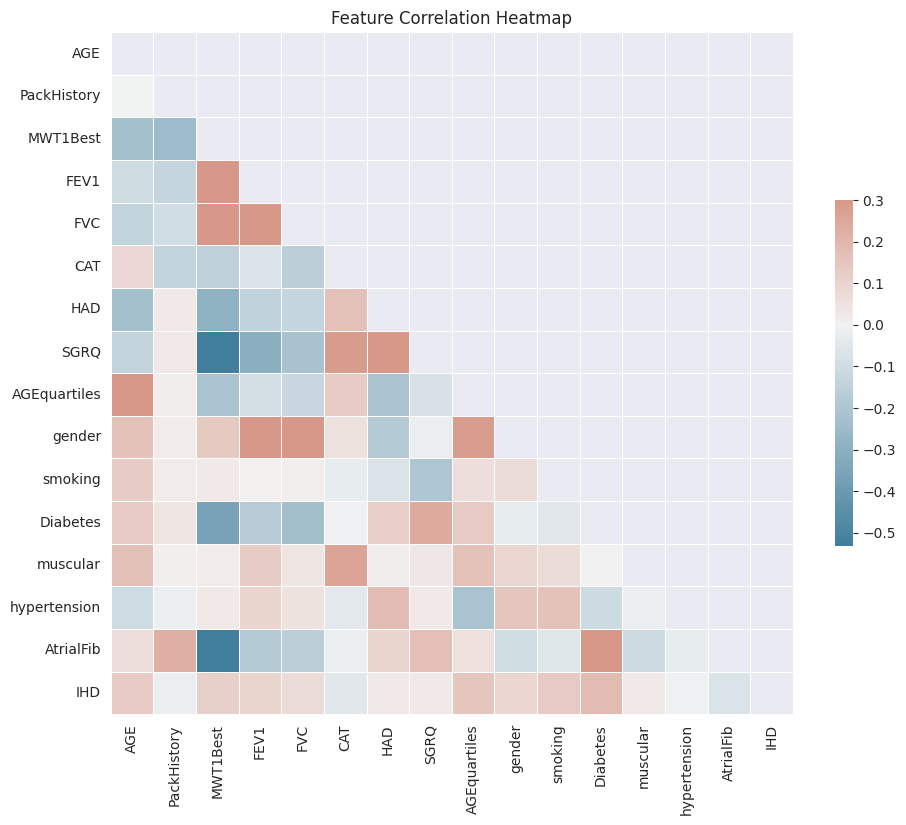

In [29]:
import seaborn as sns
sns.set_style('dark')

mask = np.triu(np.ones_like(corr_X1, dtype=bool))

f , ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(corr_X1, mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Feature Correlation Heatmap')
plt.show()

In [33]:
def feature_engineering(df):
    df["FEV1_FVC_Ratio"] = df["FEV1"] / df["FVC"]
    df["Lung_Efficiency_Index"] = df["FEV1_FVC_Ratio"] * df["MWT1Best"]
    
    return df

X1 = feature_engineering(X1)

In [34]:
X1.head()

,AGE,PackHistory,MWT1Best,FEV1,FVC,CAT,HAD,SGRQ,AGEquartiles,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD,COPDSEVERITY,FEV1_FVC_Ratio,Lung_Efficiency_Index
0,77.0,60.0,120.0,1.21,2.40,25.0,8.0,69.55,4.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,SEVERE,0.504167,60.500000
1,79.0,50.0,176.0,1.09,1.64,12.0,21.0,44.24,4.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,MODERATE,0.664634,116.975610
2,80.0,11.0,201.0,1.52,2.30,22.0,18.0,44.09,4.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,MODERATE,0.660870,132.834783
3,56.0,60.0,210.0,0.47,1.14,28.0,26.0,62.04,1.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,VERY SEVERE,0.412281,86.578947
4,65.0,68.0,210.0,1.07,2.91,32.0,18.0,75.56,1.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,SEVERE,0.367698,77.216495


In [35]:
X1.to_csv("X1", index=False)